In [19]:
%run supportvectors-common.ipynb



<div style="color:#aaa;font-size:8pt">
<hr/>

 </blockquote>
 <hr/>
</div>



# Outliers and novelty detection

When looking for anomalies in the data, we can take one one two possible approaches:

* **Outlier detection** The dataset is known to contain outliers. Our detector must be able to differentiate between the inliner points and the outliers.

* **Novelty detection** The dataset is a clean one without any outliers. It represents what normal data is -- and thus one can learn its distribution. Then given a new instance of data, the detector needs to determine if it belongs to the learned distribution, or is an outlier.


### Tukey's outliers in one-dimensional data

Let us start with the simple Tukey's definition of outliers in one-dimensions. For this, let us first recall the descriptive statistics definitions relevant here. Assume that the data has been sorted by value. Then the **first quartile (Q1)** represents the point value below which there are 25% of the instances. Likewise **third quartile (Q3)** represents the point value above with there are 75% of the instances. The **Inter-quartile range (IQR)** is the range of data instances whose values are between Q1 and Q3. Then let:

\begin{align}
    k &\in [0,1] &\text{any constant between zero and one}\\
    \text{inliners} &\in [Q1 -k*IQR,Q3 + k*IQR ] & \text{a value is an inliner if it is within this range}\\
\end{align}


All other values are outliers. Tukey proposed that we use $k=1.5$, a value that has become a de-facto default. First, consider a normal distribution:

In [38]:
def outlier_plot (x:np.array) -> None: 
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1
    k = 1.5
    lower_threshold = q1 - k*iqr
    upper_threshold = q3 + k*iqr

    plt.hist(x, bins=1000, color='salmon', density=True)
    plt.axvline(x=lower_threshold, color='midnightblue',linewidth=3)
    plt.axvline(x=upper_threshold, color='midnightblue', linewidth=3)
   
   
    


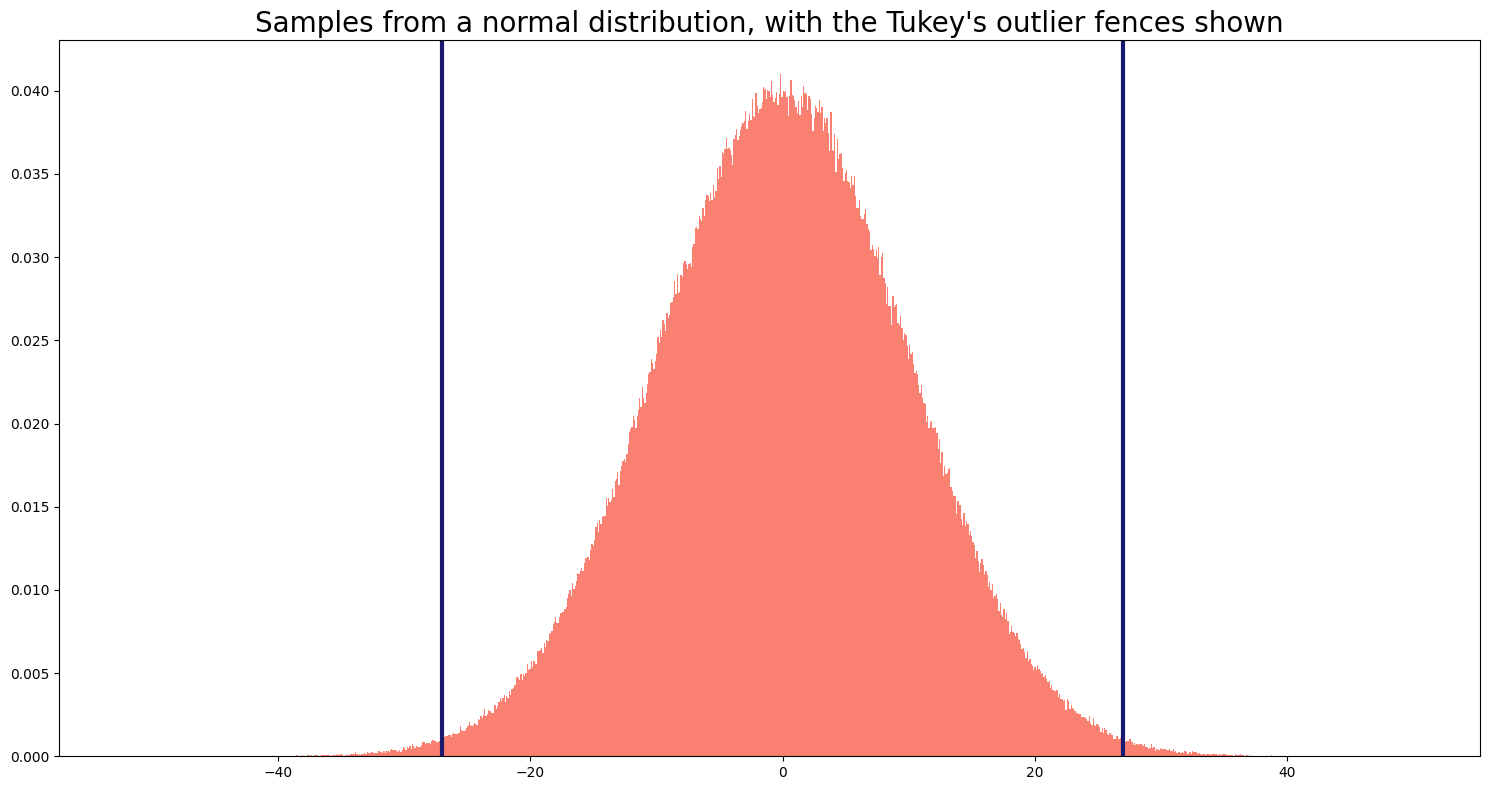

In [39]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
# Normal distribution
from scipy.stats import norm, beta

plt.rcParams["figure.figsize"] = (15,8)
GAZILLION =1_000_000

x = norm.rvs(0, 10, size=GAZILLION)

outlier_plot(x)
plt.title("Samples from a normal distribution, with the Tukey's outlier fences shown", fontsize=20)
plt.tight_layout()

We can clearly see that a very small proportion of values are outside the fences. The Tukey fences work well for data that has an approximately normal distribution. As another example, below we observe it for a gamma-distributed data.

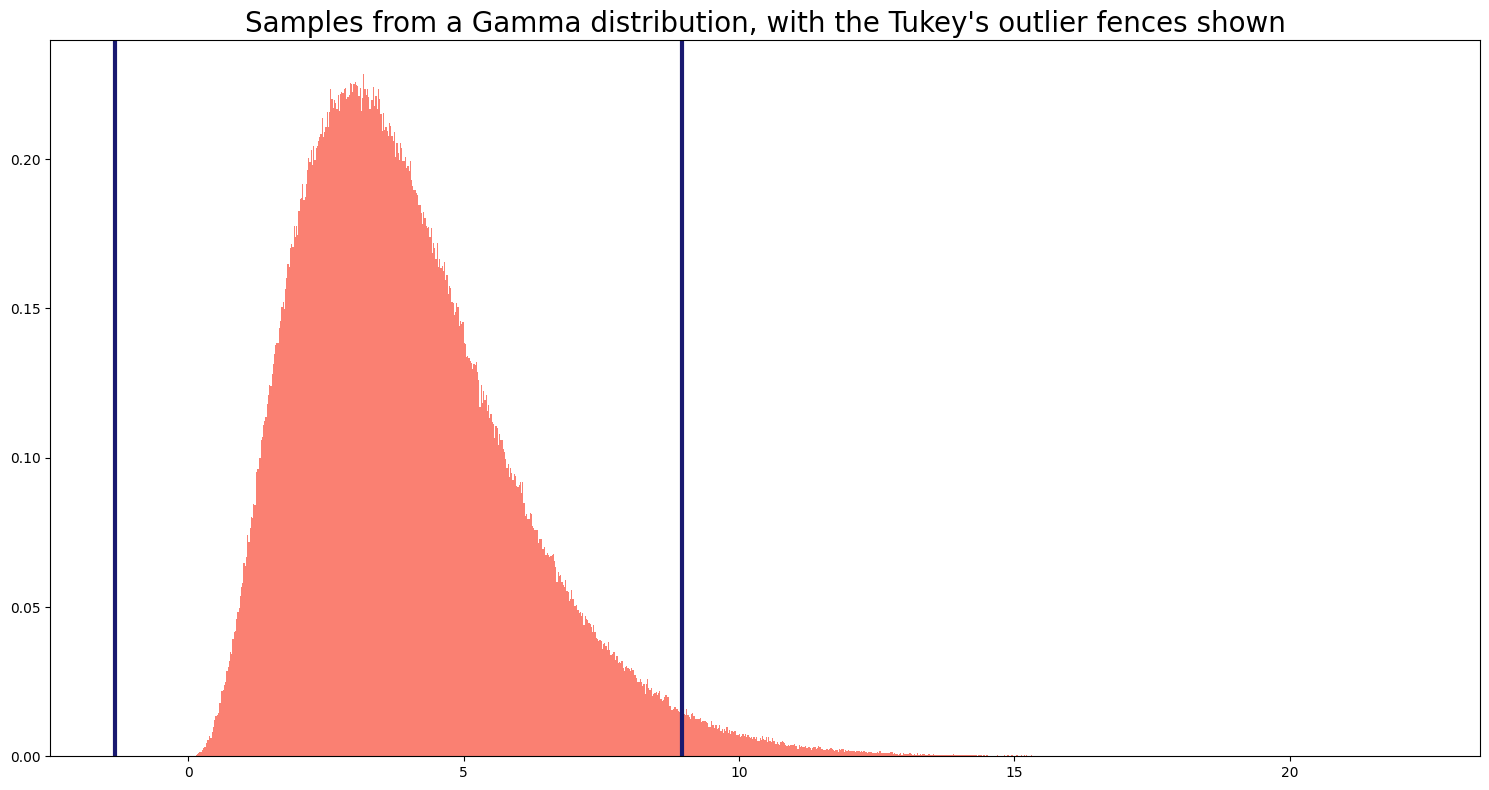

In [40]:
from scipy.stats import norm, gamma

a = 4
x = gamma.rvs(a, size=GAZILLION)
outlier_plot(x)
plt.title("Samples from a Gamma distribution, with the Tukey's outlier fences shown", fontsize=20)
plt.tight_layout()

### z-value based outliers

Another common approach is to normalize the data to its z-values. Then all values outside the range $[-3, 3]$ are considered outliers.

Let us see how it works for the bell-curve and the gamma distributions.


In [41]:
x_gaussian = norm.rvs(0, 10, size=GAZILLION)
x_gamma = gamma.rvs(a, size=GAZILLION)

z_bell = stats.zscore(x_gaussian)
z_gamma = stats.zscore(x_gamma)

In [42]:
def z_outlier_plot(x:np.array) -> None:
    lower_threshold, upper_threshold = -3, 3
    plt.hist(x, bins=1000, color='salmon', density=True)
    plt.axvline(x=lower_threshold, color='midnightblue',linewidth=3)
    plt.axvline(x=upper_threshold, color='midnightblue', linewidth=3)

#### For the gaussian distribution

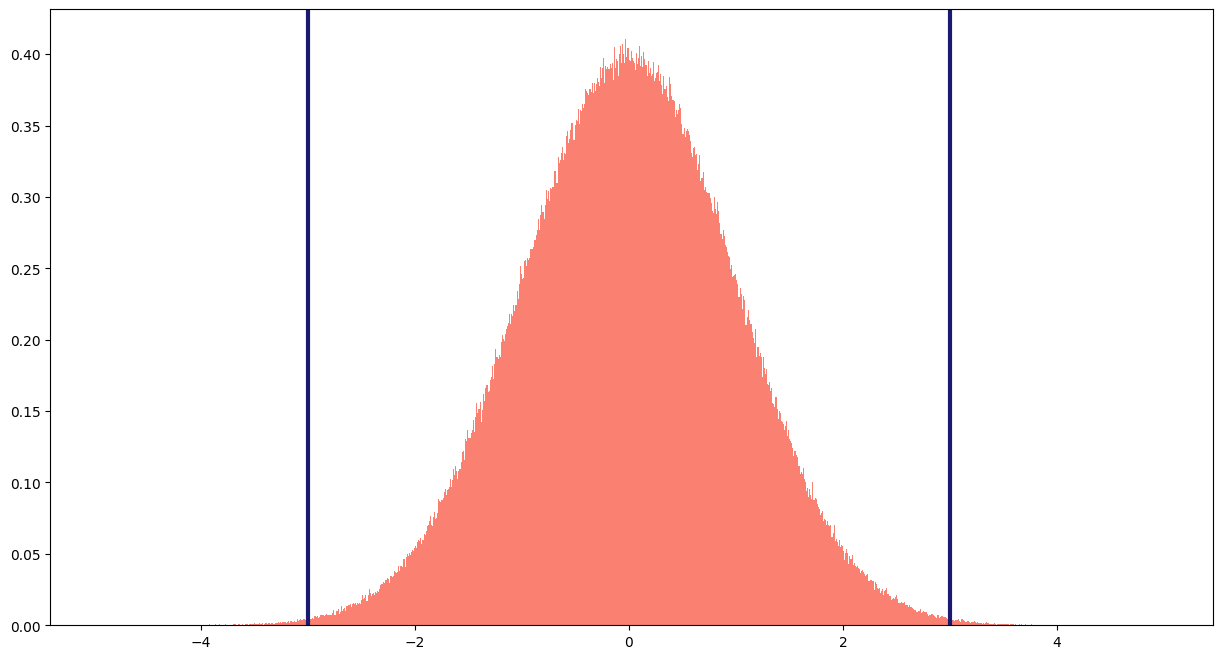

In [43]:
z_outlier_plot(z_bell)

#### For the Gamma distribution

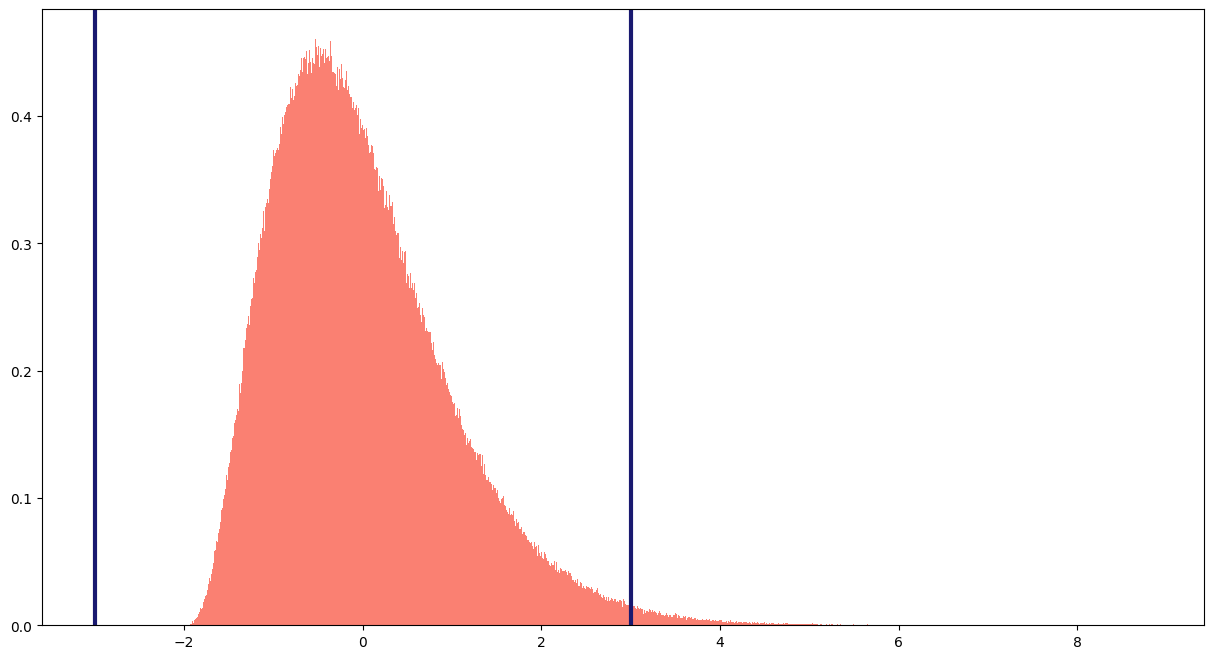

In [44]:
z_outlier_plot(z_gamma)

## Other outlier definitions

Over the years, many other outlier definitions have emerged for univariate data. However, the above two definitions continue to be the most prevalent.

### Homework

Find out some of the other definitions of outliers for univariate data, and visualize them in a matter we did here.